In [1]:
import pandas as pd
import numpy as np
import utils

In [2]:
data = pd.read_csv('data/data.csv')

In [3]:
data['date'] = pd.to_datetime(data['date'])

In [4]:
data = data.set_index('date')
data = data.sort_index()

In [21]:
area_1 = data[data.variable == 'area_1'].drop('variable', axis = 1).sort_index()
area_2 = data[data.variable == 'area_2'].drop('variable', axis = 1).sort_index()
area_3 = data[data.variable == 'area_3'].drop('variable', axis = 1).sort_index()

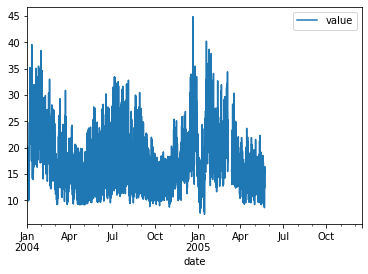

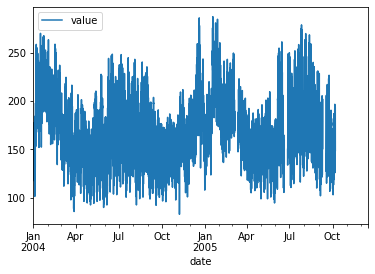

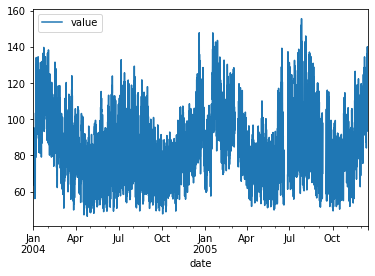

In [27]:
area_1.plot()
area_2.plot()
area_3.plot()

In [16]:
print(area_1.shape)
print(area_2.shape)
print(area_3.shape)

(17160, 2)
(17160, 2)
(17160, 2)
